3 Exploratory Data Analysis

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Imports](#3.2_Imports)
  * [3.3 Load The Data](#3.3_Load_The_Data)
  * [3.4 Explore The Data](#3.4_Explore_The_Data)
    * [3.4.1 Summary Statistics](#3.4.1_Summary_Statistics)
    * [3.4.2 Income Ranges of All Applicants](#3.4.2_Income_Ranges_of_All_Applicants)
    * [3.4.3 Income Ranges of Applicants With Payment Issues By Gender](#3.4.3_Income_Ranges_of_Applicants_With_Payment_Issues_By_Gender)
    * [3.4.4 Income Ranges of Applicants Without Payment Issues By Gender](#3.4.4_Income_Ranges_of_Applicants_Without_Payment_Issues_By_Gender)
    * [3.4.5 Age Groups Of All Applicants](#3.4.5_Age_Groups_Of_All_Applicants)
    * [3.4.6 Education Types Of All Applicants](#3.4.6_Education_Types_Of_All_Applicants)
    * [3.4.7 Family Status and Region Rating of All Applicants](#3.4.7_Family_Status_and_Region_Rating_of_All_Applicants)
    * [3.4.8 Income Totals and Credit Amounts Of All Applicants](#3.4.8_Income_Totals_and_Credit_Amounts_Of_All_Applicants)
  * [3.5 Visualizing High Dimensional Data](#3.5_Visualizing_High_Dimensional_Data)
    * [3.5.1 Scale the data](#3.5.1_Scale_the_data)
    * [3.5.2 Calculate the PCA transformation](#3.5.2_Calculate_the_PCA_transformation)    
  * [3.6 Pairwise Covariance and Correlation of Features](#3.6_Pairwise_Covariance_and_Correlation_of_Features)    

## 3.2 Imports<a id='3.2_Imports'></a>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pd.set_option('display.max_columns', 100)

In [2]:
os.chdir(r'C:\Users\daenj\OneDrive\Desktop\Datasets\Capstone 2021')
os.getcwd()

'C:\\Users\\daenj\\OneDrive\\Desktop\\Datasets\\Capstone 2021'

## 3.3 Loading the Data<a id='3.3_Loading_the_Data'></a>

In [3]:
#Importing data sets
nopay_data = pd.read_csv("nopaymentissues_data.csv")
nopay_data = nopay_data.drop(columns = "Unnamed: 0")
nopay_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH_BINS,INCOME_VAL
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291.0,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,828.0,Middle_Age,Medium
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225.0,4260.0,2531.0,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,815.0,Middle_Age,Low
2,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039.0,9833.0,2437.0,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,617.0,Middle_Age,Low
3,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038.0,4311.0,3458.0,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,1106.0,Middle_Age,Low
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,46,1588.0,4970.0,477.0,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,2536.0,Middle_Age,Low


In [4]:
payissu_data = pd.read_csv("paymentissues_data.csv")
payissu_data = payissu_data.drop(columns = "Unnamed: 0")
payissu_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH_BINS,INCOME_VAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637.0,3648.0,2120.0,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1134.0,Young,Medium
1,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51,2628.0,6573.0,1827.0,1,1,0,1,0,0,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,161.0,Middle_Age,Low
2,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47,1262.0,1182.0,1029.0,1,1,0,1,0,0,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,1075.0,Middle_Age,Medium
3,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36,3597.0,45.0,4409.0,1,1,1,1,1,0,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,1480.0,Young,Low
4,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67,365243.0,5391.0,4199.0,1,0,0,1,0,0,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.0,Senior,Low


In [5]:
clean_data = pd.read_csv("cleaned_data.csv")
clean_data = clean_data.drop(columns = "Unnamed: 0")
clean_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH_BINS,INCOME_VAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637.0,3648.0,2120.0,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1134.0,Young,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291.0,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,828.0,Middle_Age,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225.0,4260.0,2531.0,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,815.0,Middle_Age,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039.0,9833.0,2437.0,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,617.0,Middle_Age,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038.0,4311.0,3458.0,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,1106.0,Middle_Age,Low


## 3.4 Explore the Data<a id='3.4_Explore_the_Data'></a>

## 3.4.1 Summary Statistics<a id='3.4.1_Summary_Statistics'></a>

Descriptive Statistics for 'float' variables

In [6]:
clean_data.select_dtypes('float').agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
count,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000
min,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,0.000290,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000
max,1.170000e+08,4.050000e+06,2.580255e+05,4.050000e+06,0.072508,3.652430e+05,2.467200e+04,7.197000e+03,20.000000,4292.000000
mad,6.622635e+04,3.165837e+05,1.097507e+04,2.883787e+05,0.010291,1.071492e+05,2.915440e+03,1.316243e+03,0.665866,696.274722
mean,1.687979e+05,5.990260e+05,2.710849e+04,5.383163e+05,0.020868,6.772474e+04,4.986120e+03,2.994202e+03,2.152665,962.858788
median,1.471500e+05,5.135310e+05,2.490300e+04,4.500000e+05,0.018850,2.219000e+03,4.504000e+03,3.254000e+03,2.000000,757.000000
quantile,1.471500e+05,5.135310e+05,2.490300e+04,4.500000e+05,0.018850,2.219000e+03,4.504000e+03,3.254000e+03,2.000000,757.000000
kurt,1.917866e+05,1.934041e+00,7.707756e+00,2.437440e+00,3.260065,7.715474e-01,-3.213466e-01,-1.106808e+00,2.802015,-0.308571
skew,3.915597e+02,1.234778e+00,1.579824e+00,1.350143e+00,1.488009,1.664338e+00,5.908716e-01,-3.493275e-01,0.987546,0.713607
var,5.622739e+10,1.619988e+11,2.100604e+08,1.363744e+11,0.000191,1.944456e+10,1.241073e+07,2.278441e+06,0.829336,683610.051185


In [7]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.487841,14493.461065,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538316.294367,369288.982246,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,43.435968,11.954593,20.00000,34.000000,43.00000,53.000000,6.900000e+01
DAYS_EMPLOYED,307511.0,67724.742149,139443.751806,0.00000,933.000000,2219.00000,5707.000000,3.652430e+05


Distributions for variables among applicants with payment issues. Most of the applicants that are struggling with payments are those with an outstanding credit amount of 1 million dollars or less. The most applicants are having payment issues with around half a million dollars of credit. Interestingly, it appears couples and singles have the most payment issues.

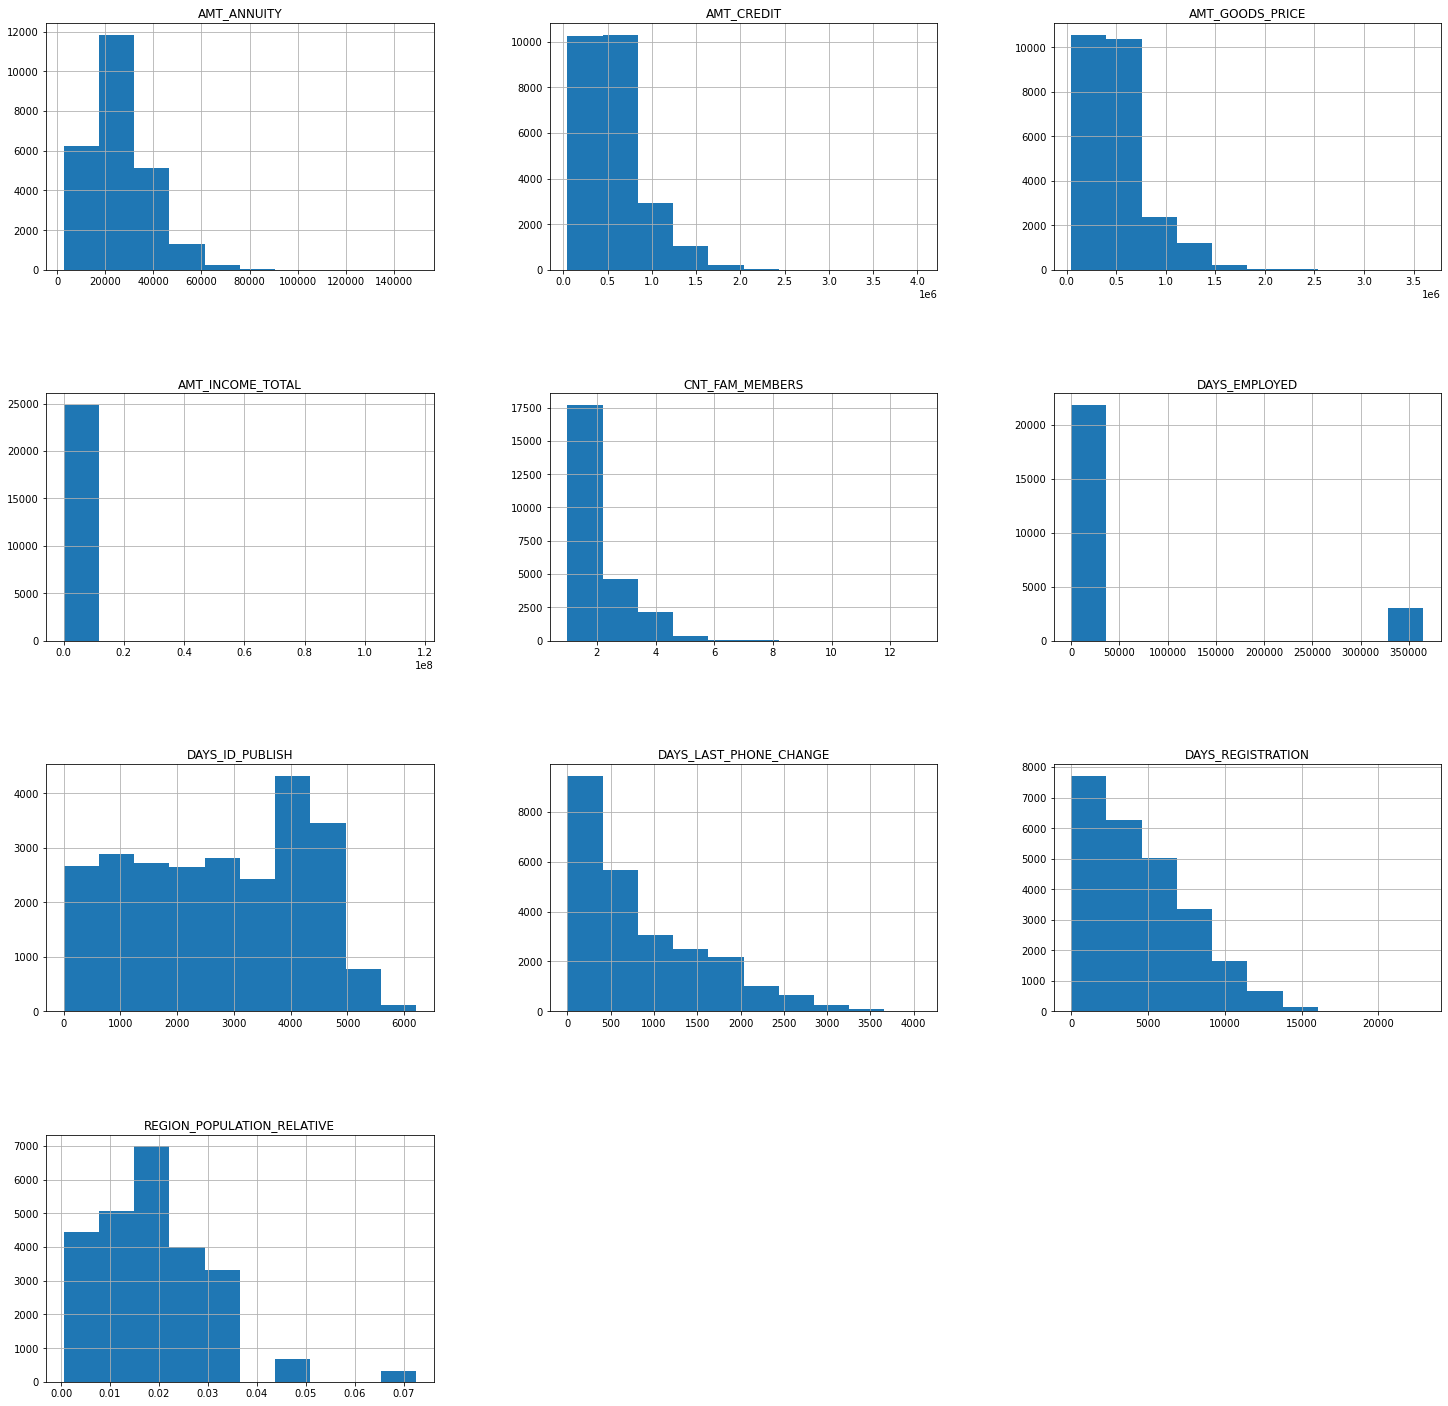

In [8]:
payissu_data.select_dtypes('float').hist(figsize=(25,25))
plt.subplots_adjust(hspace=0.5);

Distribution of variables among applicants with NO payment issues. Most applicants with no payment issues are taking out less than a million dollars of credit. 

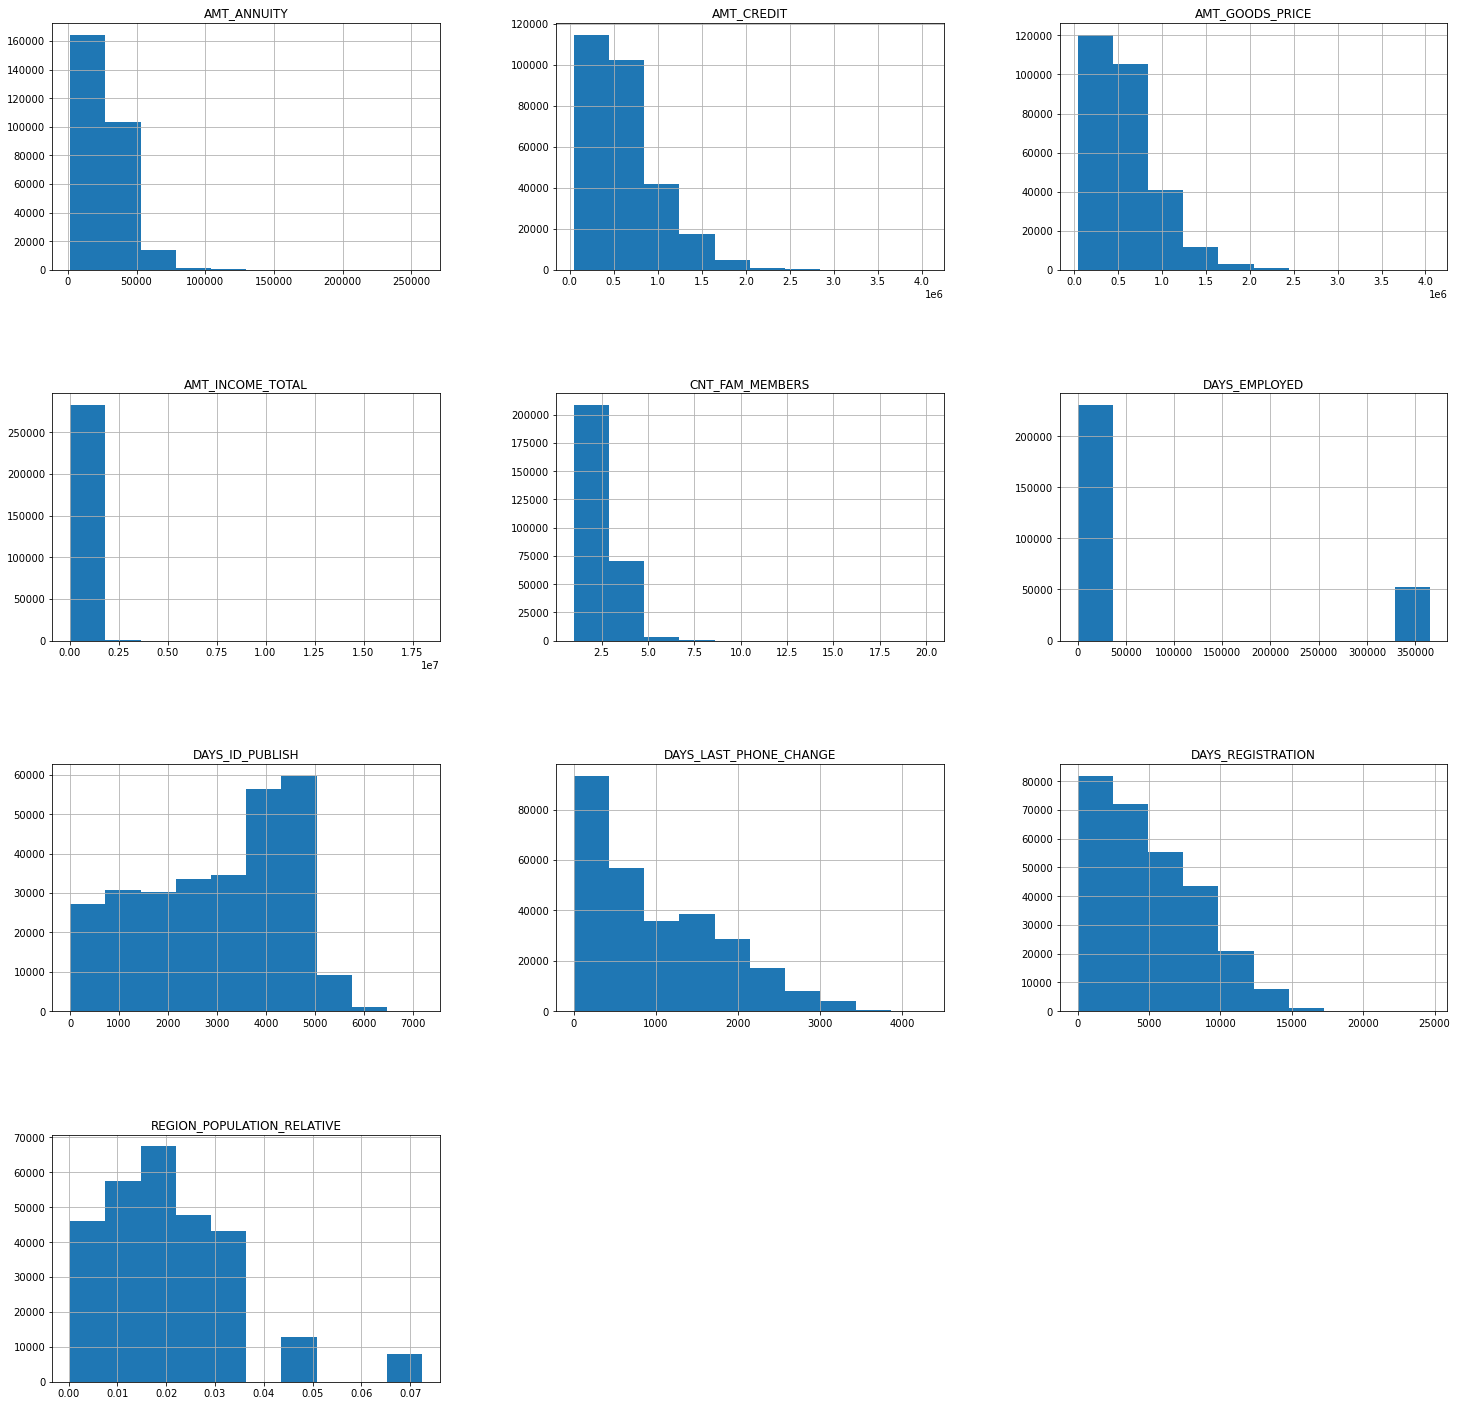

In [9]:
nopay_data.select_dtypes('float').hist(figsize=(25,25))
plt.subplots_adjust(hspace=0.5);

## 3.4.2 Income Ranges of All Applicants<a id='3.4.2_Income_Ranges_of_All_Applicants'></a>

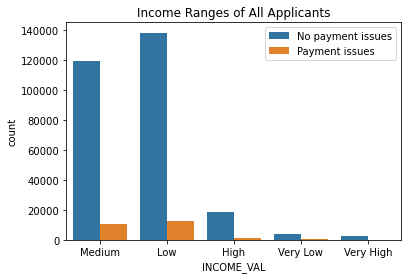

In [10]:
ax_1 = sns.countplot(x='INCOME_VAL', hue='TARGET', data= clean_data)
plt.title('Income Ranges of All Applicants')
ax_1.legend(['No payment issues','Payment issues'])

## 3.4.3 Income Ranges of Applicants With Payment Issues By Gender<a id='3.4.3_Income_Ranges_of_Applicants_With_Payment_Issues_By_Gender'></a>

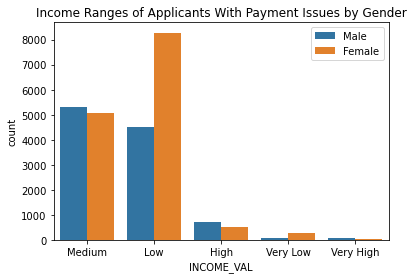

In [11]:
ax_3 = sns.countplot(x='INCOME_VAL', hue='CODE_GENDER', data= payissu_data)
plt.title('Income Ranges of Applicants With Payment Issues by Gender')
plt.legend(['Male','Female'])

## 3.4.4 Income Ranges of Applicants Without Payment Issues By Gender<a id='3.4.4_Income_Ranges_of_Applicants_Without_Payment_Issues_By_Gender'></a>

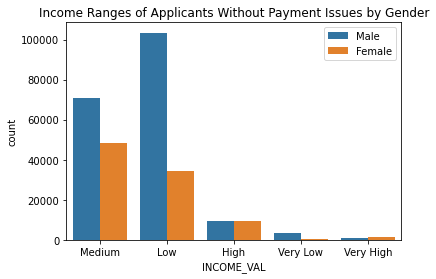

In [12]:
ax_4 = sns.countplot(x='INCOME_VAL', hue='CODE_GENDER', data= nopay_data)
plt.title('Income Ranges of Applicants Without Payment Issues by Gender')
plt.legend(['Male','Female'])

Women in the low income range make up the bulk of applicants with payment issues. On the flip side, men in the low income range make up most of the applicants without payment issues. In both cases, the medium and low income ranges make up the bulk of applicants.

## 3.4.5 Age Groups of All Applicants<a id='3.4.5_Age_Groups_of_All_Applicants'></a>

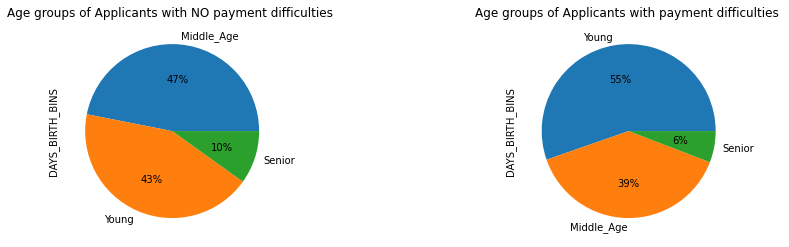

In [13]:
fig =plt.subplots(1,2,figsize=[15,4])
plt.subplot(1,2,1)
nopay_data.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with NO payment difficulties ')
plt.subplot(1,2,2)
payissu_data.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with payment difficulties ')
plt.show()

## 3.4.6 Education Types of All Applicants<a id='3.4.6_Education_Types_of_All_Applicants'></a>

Let's look at the education types of borrowers with and without payment issues. As observed in the wrangling, applicants without payment issues are about 9% of the total applicants in this dataset. What's interesting is that at first glance, these bargraphs look identical. We can infer that those with secondary education make up most of the pool of applicants.

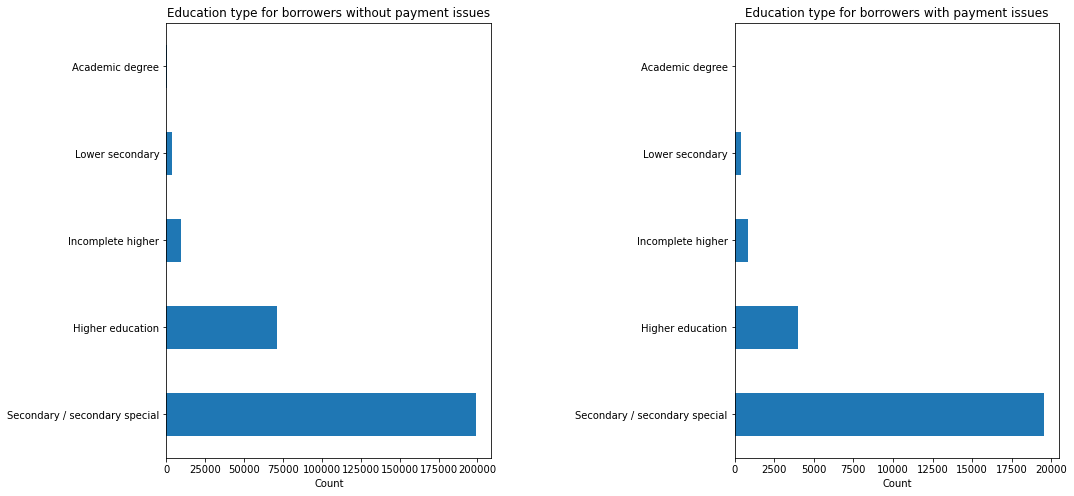

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

nopay_data.NAME_EDUCATION_TYPE.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Education type for borrowers without payment issues')
ax[0].set_xlabel('Count')

payissu_data.NAME_EDUCATION_TYPE.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Education type for borrowers with payment issues')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.75);

The trend between both bar graphs below is that those whose incomes are very low, high, or very high make up a small percentage of people borrowing money.
The low income range has the highest count in both applicants with NO payment difficulties and with payment difficulties. Medium range applicants are close behind in both cases.

## 3.4.7 Family Status and Region Rating of All Applicants<a id='3.4.7_Family_Status_and_Region_Rating_of_All_Applicants'></a>

Married couples account for many of the applicants. We are getting a clearer picture of what most of these applicants look like, according to this data. 

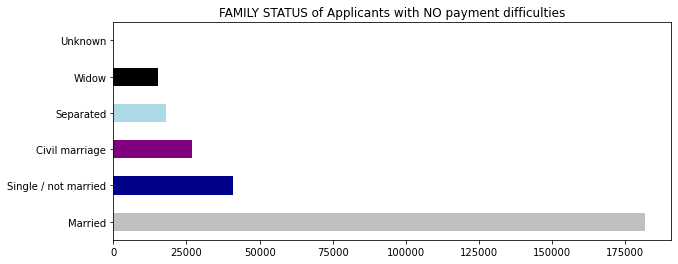

In [15]:
#Family status of potential borrowers with NO payment issues
plt.figure(figsize=[10,4])
nopay_data.NAME_FAMILY_STATUS.value_counts().plot.barh(color=['silver', 'darkblue', 'purple', 'lightblue', 'black'])
plt.title('FAMILY STATUS of Applicants with NO payment difficulties')
plt.show()

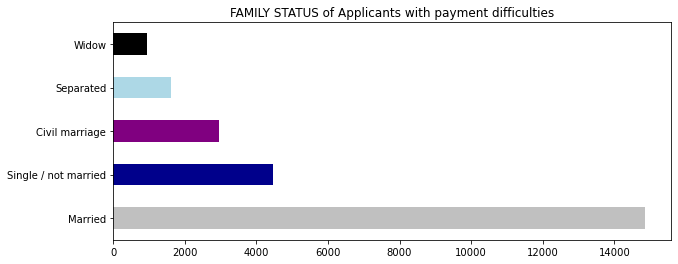

In [16]:
#Family status of potential borrowers with payment issues
plt.figure(figsize=[10,4])
payissu_data.NAME_FAMILY_STATUS.value_counts().plot.barh(color=['silver', 'darkblue', 'purple', 'lightblue', 'black'])
plt.title('FAMILY STATUS of Applicants with payment difficulties')
plt.show()

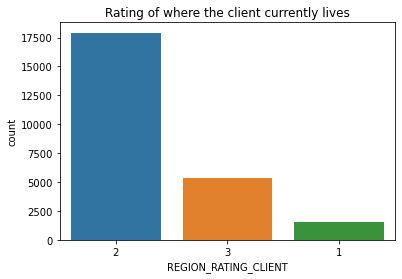

In [17]:
#Lets look at the region ratings.
#Based on what we've seen so far, it can be inferred that regions rated as 1 are affluent. They have no reason to seek out loans.  
sns.countplot(data=payissu_data,x = 'REGION_RATING_CLIENT',order = payissu_data['REGION_RATING_CLIENT'].value_counts().index)
plt.title('Rating of where the client currently lives')
plt.show()

## 3.4.8 Income Totals and Credit Amounts of All Applicants<a id='3.4.8_Income_Totals_and_Credit_Amounts_of_All_Applicants'></a>

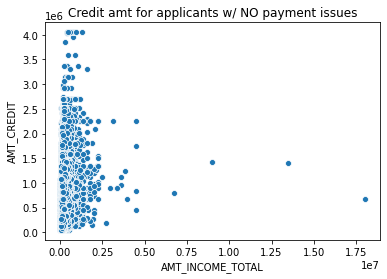

In [18]:
#High income does not equate to higher credit amounts. As stated earlier, most potential borrowers live a middle or lower class life.

sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=nopay_data)
plt.title('Credit amt for applicants w/ NO payment issues')
plt.show()

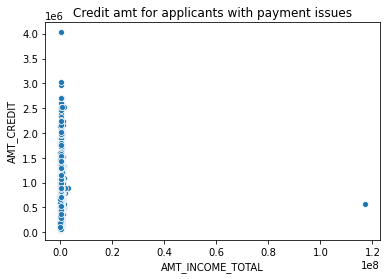

In [19]:
#In the case of those with payment issues, most are in lower class earners. There is one high income outlier that had payment issues.

sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=payissu_data)
plt.title('Credit amt for applicants with payment issues')
plt.show()

### 3.5 Visualizing High Dimensional Data<a id='3.5_Visualizing_High_Dimensional_Data'></a>

### 3.5.1 Scale the Data<a id='3.5.1_Scale_the_Data'></a>

In [20]:
clean_scale = clean_data.select_dtypes(['int','float'])
clean_scale = scale(clean_scale)

In [21]:
clean_scaled_df = pd.DataFrame(clean_scale)
clean_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,-0.481110,-0.379837,-0.579154,-1.265724,0.206991
1,0.426792,1.725450,0.592683,1.600873,-1.252750,-0.477159,-1.078697,-1.790855,-0.167639,-0.163108
2,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,-0.484065,-0.206116,-0.306869,-1.265724,-0.178831
3,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-0.463885,1.375829,-0.369143,-0.167639,-0.418307
4,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,-0.463892,-0.191639,0.307263,-1.265724,0.173126


In [22]:
clean_scaled_df.mean()

0    7.880806e-16
1   -9.238467e-17
2    8.428006e-18
3    2.333549e-16
4    7.550907e-17
5   -3.312792e-16
6    5.944310e-18
7   -7.987038e-17
8   -9.889309e-16
9    5.681571e-16
dtype: float64

In [23]:
clean_scaled_df.std(ddof=0)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64

### 3.5.2 Calculate the PCA Transformation<a id='3.5.2_Calculate_the_PCA_Transformation'></a>

In [24]:
clean_pca = PCA().fit(clean_scale)

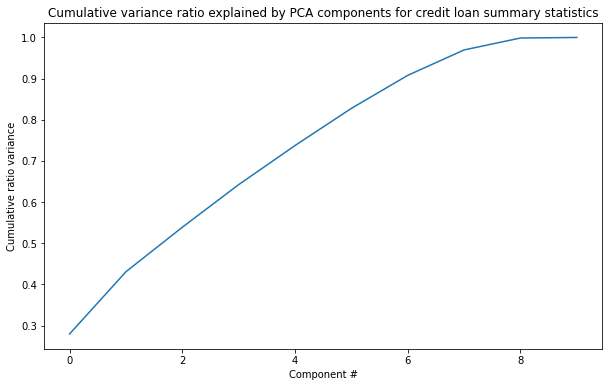

In [25]:
plt.subplots(figsize=(10, 6))
plt.plot(clean_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for credit loan summary statistics');

### 3.6 Pairwise Covariance and Correlation of Features<a id='3.6_Pairwise_Covariance_and_Correlation_of_Features'></a>

In [26]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

In [27]:
#Computing pairwise covariance betweens all variables
clean_data.cov().style.applymap(color_)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,10565820148.159868,-59.041266,-83.819815,-44367771.218533,-14197298.898041,-641822.003776,-9783776.440256,1.207224,1802.107496,19615875.468394,352482.006520,59637.043657,0.519822,-52.792950,-17.026415,12.488786,127.210825,6.675923,-271.008838,-56.230029,-58.787004,117.591486,-3.550655,24.765159,58.934592,-52.006771,-68.495018,2.649812,72918.788558
TARGET,-59.041266,0.074212,0.003774,-257.215642,-3329.870551,-50.596432,-3986.147724,-0.000140,-0.254782,-1787.133433,-40.283273,-21.159315,0.000000,0.004814,0.003105,0.000004,-0.002915,-0.000111,0.002309,0.008168,0.008340,-0.021500,0.000186,0.000415,0.000152,0.003247,0.005850,0.003400,-12.437281
CNT_CHILDREN,-83.819815,0.003774,0.521459,2205.819942,623.567129,223.733116,-495.029908,-0.000255,-2.856489,-24326.260597,-466.548716,30.541355,0.000001,0.066797,0.016050,-0.000025,-0.009708,0.003778,0.578153,0.009345,0.008997,-0.017197,-0.001175,0.001297,0.002116,0.003891,0.021485,0.019390,3.501821
AMT_INCOME_TOTAL,-44367771.218533,-257.215642,2205.819942,56227386501.183823,14971679825.342999,658672877.330159,13978460413.435585,245.308712,-77176.577544,-2110737735.737513,-23227477.052352,-3044601.787565,0.139176,5831.287325,-1628.812981,-84.844377,16.942312,2104.964343,3528.843149,-10315.966258,-10935.727052,28234.009961,903.266175,3245.110721,2718.974220,227.490208,642.171732,754.050882,3643707.246121
AMT_CREDIT,-14197298.898041,-3329.870551,623.567129,14971679825.342999,161998825566.727020,4492522228.339808,146663655469.488037,555.237032,266601.253268,-3609886231.754904,-13642359.041591,3994437.613781,1.041960,10133.710815,-3390.522110,410.922527,4742.624209,1548.413579,23150.580076,-20852.093655,-22443.371798,69321.912680,1180.199562,4588.287154,4181.960397,-2904.970945,-3196.090446,12.484608,24526396.645146
AMT_ANNUITY,-641822.003776,-50.596432,223.733116,658672877.330159,4492522228.339808,210060413.656948,4147138961.263255,23.738459,-1637.912869,-207858545.830133,-1966460.235840,-246486.096478,0.003894,576.614927,-143.631485,13.981671,70.354372,240.391814,997.059921,-948.150921,-1032.289841,2473.879380,73.087006,252.635987,213.337690,-24.188536,5.454282,56.073974,763890.574208
AMT_GOODS_PRICE,-9783776.440256,-3986.147724,-495.029908,13978460413.435585,146663655469.488037,4147138961.263255,136374352408.136261,528.746906,236114.411878,-3202502318.334204,-15020319.591569,5177988.785878,0.931080,8998.828956,116.148753,329.888677,6958.967424,1454.762828,20560.712321,-19504.770516,-20827.658288,75098.165623,1177.951033,4308.486537,3853.012292,-2697.053825,-3164.377955,-189.138272,23294789.358614
REGION_POPULATION_RELATIVE,1.207224,-0.000140,-0.000255,245.308712,555.237032,23.738459,528.746906,0.000191,0.004902,-7.895338,2.622417,0.083372,0.000000,0.000021,-0.000086,-0.000007,0.000565,0.000128,-0.000305,-0.003752,-0.003696,0.007737,0.000004,0.000173,0.000221,-0.000188,-0.000257,-0.000081,0.503326
DAYS_BIRTH,1802.107496,-0.254782,-2.856489,-77176.577544,266601.253268,-1637.912869,236114.411878,0.004902,142.912292,1040002.040076,13973.486435,4911.353146,0.000066,-2.847437,-0.823734,0.007701,0.228028,-0.243797,-3.036187,-0.057287,-0.048811,-3.550679,-0.095656,-0.251378,-0.164115,-0.578850,-1.220057,-0.728688,819.037356
DAYS_EMPLOYED,19615875.468394,-1787.133433,-24326.260597,-2110737735.737513,-3609886231.754904,-207858545.830133,-3202502318.334204,-7.895338,1040002.040076,19444559917.630081,105407803.909767,57849712.379632,0.219283,-53572.245284,-13016.432053,77.544051,1055.

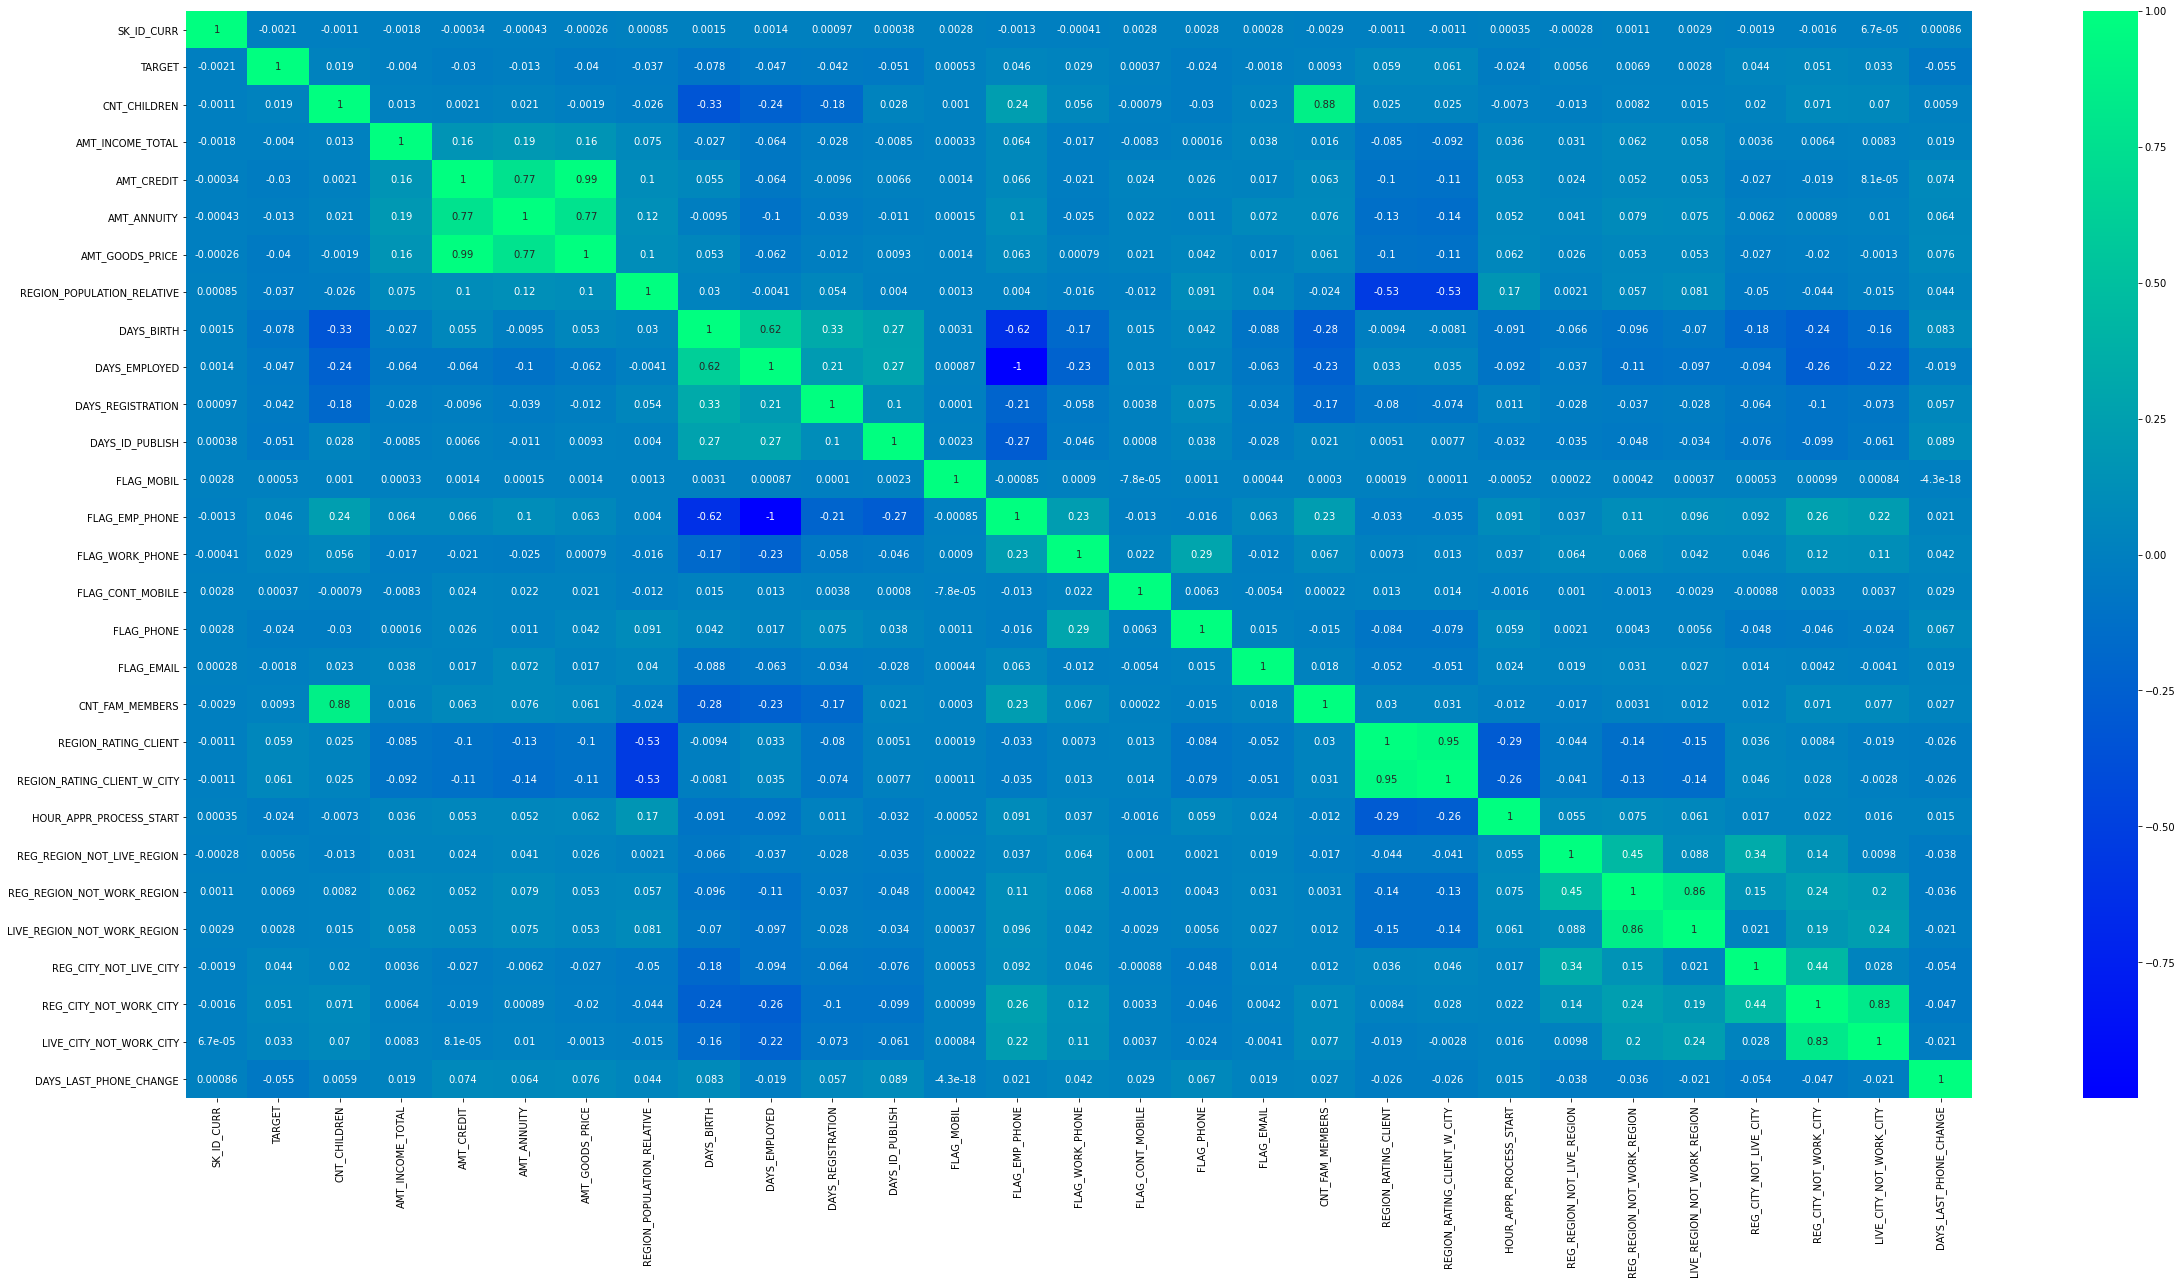

In [28]:
#Here is the pairwise correlation among variables
plt.figure(figsize = (40,20))
sns.heatmap(clean_data.corr(), annot=True, cmap='winter')

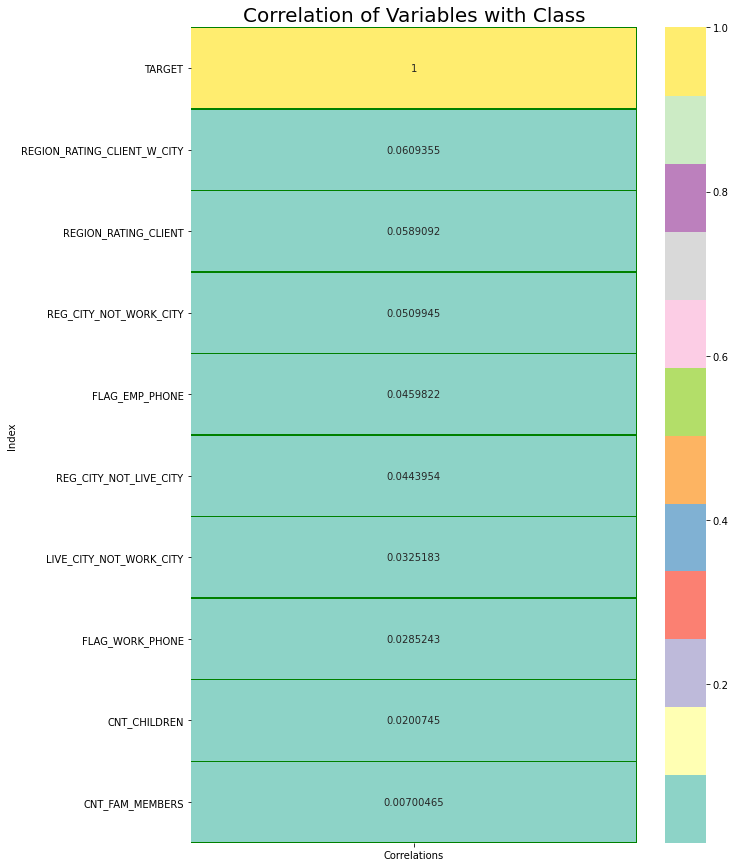

In [29]:
corr = clean_data.corrwith(clean_data['TARGET'],method='spearman').reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False).head(10)

plt.figure(figsize=(10, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='green')

plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()